In [1]:
###################################################
### This file is part of numsimqubits.          ###
###                                             ###    
### Copyright (c) 2020 and later, Andras Gyenis ###
### All rights reserved.                        ###
###################################################

# Importing packages, modules.

import sys
import numpy as np
sys.path.append('../')

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Image, Markdown

import numsimqubits.dynamics as dyn
from numsimqubits.dynamics.driven_systems import four_level_two_drive
from matplotlib.ticker import AutoMinorLocator
from qutip import Qobj
import qutip as qt

import numsimqubits.qubits.settings as sim_settings
sim_settings.update()

In [10]:
# Define drive object.
pulse_alpha = dyn.Gaussian_pulse(
                                t_0    = 200e-9,                   # The center of the pulse [s].
                                sigma  = 100e-9,                   # The width of the pulse [s].
                                amp    = 3.4e-3,                    # The amplitude of the pulse [GHz].
                                freq   = 5.0,                        # The frequency of drive [GHz] 
                                phase  = 0,                        # The phase of the pulse.
                                t_ls   = np.linspace(0, 0.5e-6, 201) # The time axis.  
                                )

pulse_beta = dyn.Gaussian_pulse(
                                t_0    = 200e-9,                   # The center of the pulse [s].
                                sigma  = 100e-9,                   # The width of the pulse [s].
                                amp    = 3.4e-3,                    # The amplitude of the pulse [GHz].
                                freq   = 3,                        # The frequency of drive [GHz] 
                                phase  = 0,                        # The phase of the pulse.
                                t_ls   = np.linspace(0, 0.5e-6, 201) # The time axis.  
                                )

# Define the lambda level system object.
four_level_system = dyn.Atom(
                              N_levels      = 4,               # The number of energy levels.
                              energies      = [0, 2, 2.02, 5],          # The energy of the atomic levels [GHz].
                              couplings     = [[0, 0, 0, 1],       # The couplings between energy elevels.
                                               [0, 0, 0, 1],
                                               [0, 0, 0, 0.5],
                                               [1, 1, 1, 0]], 
                              depolar_rates = [[0, 0, 0, 0],    # The decay between energy levels [GHz]. 
                                               [0, 0, 0, 0], 
                                               [0, 0, 0, 0],
                                               [0, 0, 0, 0]], 
                              dephase_rates = [[0, 0, 0, 0],      # The dephasing between energy levels [GHz].
                                               [0, 0, 0, 0], 
                                               [0, 0, 0, 0],
                                               [0, 0, 0, 0]],
                              initial_state = qt.basis(4,0)
                      )



### Calculate the dynamics

In [11]:
four_level_system.calculate_dynamics(four_level_two_drive, pulse_alpha, pulse_beta)

<IPython.core.display.Javascript object>


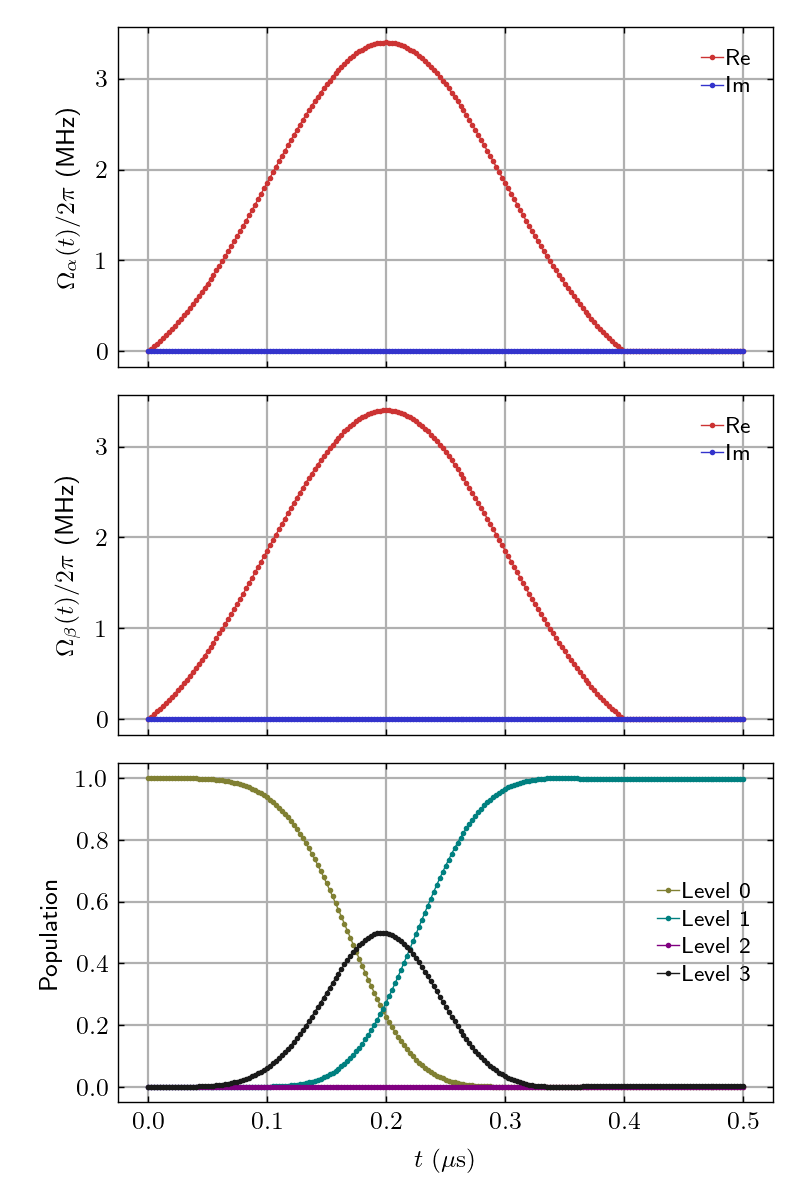

In [12]:
# Plot the pulses and the populations.

t_list = pulse_alpha.t_ls

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, 
                        gridspec_kw={'height_ratios':[1,1, 1]},
                       figsize=(4,6))

axs[0].plot(t_list * 1e6, pulse_alpha.I(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.8,0.2,0.2], label = r'Re')
axs[0].plot(t_list * 1e6, pulse_beta.Q(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.2,0.2,0.8], label = r'Im')
axs[0].set_ylabel(r"$\Omega_\alpha(t)/2\pi$ (MHz)", labelpad=5)
axs[0].legend(loc='best', fontsize = 8)
axs[0].grid()

axs[1].plot(t_list * 1e6, pulse_beta.I(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.8,0.2,0.2], label = r'Re')
axs[1].plot(t_list * 1e6, pulse_beta.Q(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.2,0.2,0.8], label = r'Im')
axs[1].set_ylabel(r"$\Omega_\beta(t)/2\pi$ (MHz)", labelpad=5)
axs[1].legend(loc='best', fontsize = 8)
axs[1].grid()

axs[2].plot(t_list * 1e6, four_level_system.population[0], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs[2].plot(t_list * 1e6, four_level_system.population[1], '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs[2].plot(t_list * 1e6, four_level_system.population[2], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.0,0.5], label = r'Level 2')

axs[2].plot(t_list * 1e6, four_level_system.population[3], '-o', markersize= 1, linewidth=0.5,
            color=[0.1,0.1,0.1], label = r'Level 3')

axs[2].set_xlabel(r"$t\ \mathrm{(}\mu \mathrm{s)}$", labelpad=5)
axs[2].set_ylabel("Population", labelpad=5)
axs[2].legend(loc='best', fontsize = 8)
axs[2].grid()

plt.tight_layout()
plt.show()

### Amplitude-Freqeuncy scan

In [86]:
amp_ls   = np.linspace(1e-3, 21e-3, 26)
delta_ls = np.linspace(-25e-3, 5e-3, 61) 

t_list = pulse_alpha.t_ls

pulse_alpha.t_0   = 80e-9 
pulse_alpha.sigma = 40e-9 
pulse_alpha.phase = 0
pulse_alpha.amp   = 8e-3
pulse_alpha.freq  = four_level_system.energies[3] - four_level_system.energies[0]

pulse_beta.t_0    = 80e-9 
pulse_beta.sigma  = 40e-9 
pulse_beta.phase  = 0 

population0_mx = np.zeros((len(amp_ls), len(delta_ls)))
population1_mx = np.zeros((len(amp_ls), len(delta_ls)))
population2_mx = np.zeros((len(amp_ls), len(delta_ls)))
population3_mx = np.zeros((len(amp_ls), len(delta_ls)))

for amp_idx, amp in enumerate(amp_ls):  
    for delta_idx, delta in enumerate(delta_ls):

        
        pulse_beta.amp    = amp        
        pulse_beta.freq   = four_level_system.energies[3] - four_level_system.energies[1] + delta
        pulse_beta.update_base()
        
        four_level_system.calculate_dynamics(four_level_two_drive, pulse_alpha, pulse_beta)
        
        population0_mx[amp_idx, delta_idx] = four_level_system.population[0][-1]
        population1_mx[amp_idx, delta_idx] = four_level_system.population[1][-1]
        population2_mx[amp_idx, delta_idx] = four_level_system.population[2][-1]
        population3_mx[amp_idx, delta_idx] = four_level_system.population[3][-1]


<IPython.core.display.Javascript object>


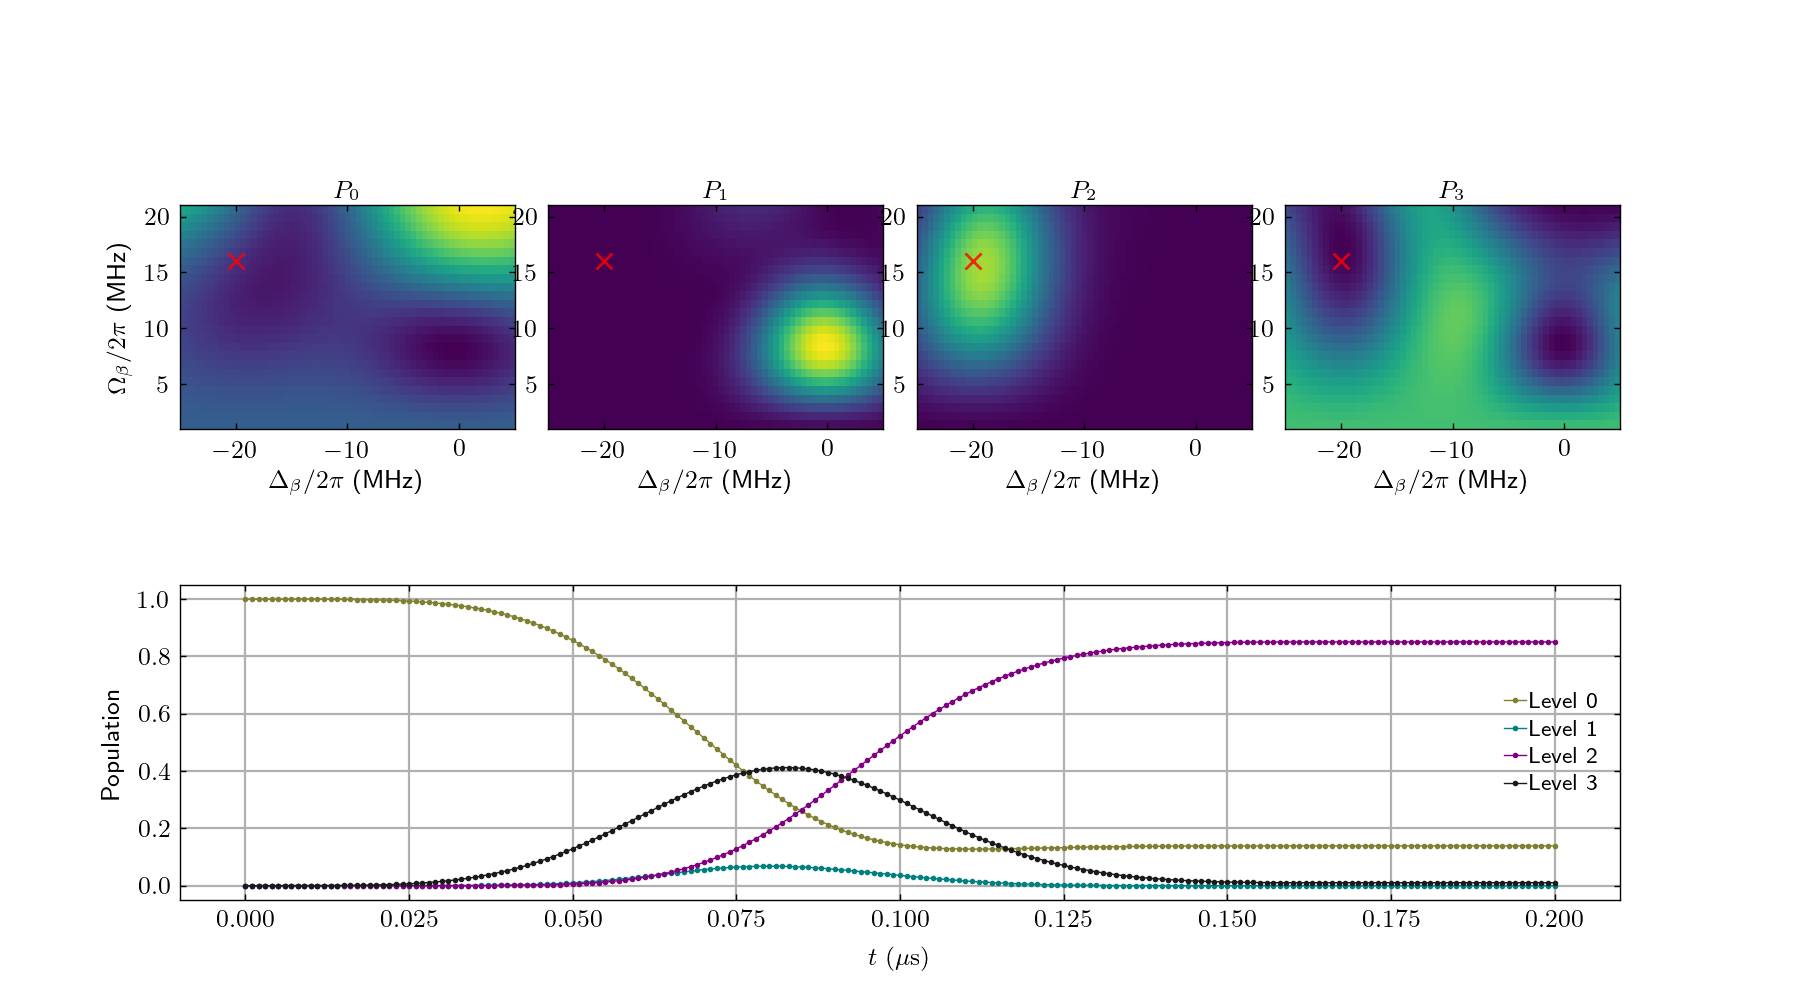

In [88]:
pulse_beta.amp   = 16e-3
delta = -20e-3
pulse_beta.freq   = four_level_system.energies[3] - four_level_system.energies[1] + delta
pulse_beta.update_base()

four_level_system.calculate_dynamics(four_level_two_drive, pulse_alpha, pulse_beta)

fig, axs = plt.subplots(figsize=(9,5), constrained_layout=False)

gs = GridSpec(2, 4, figure=fig,height_ratios=[1, 0.8],
              wspace = 0.1, hspace = 0.2, left = 0.1, right = 0.9, bottom = 0.1)

axs = []

axs.append(plt.subplot(gs[0,0]))
axs.append(plt.subplot(gs[0,1]))
axs.append(plt.subplot(gs[0,2]))
axs.append(plt.subplot(gs[0,3]))
axs.append(plt.subplot(gs[1,:]))


axs[0].imshow(np.flipud(population0_mx), 
          extent=[delta_ls[0]*1e3, delta_ls[-1]*1e3, amp_ls[0]*1e3, amp_ls[-1]*1e3],
          aspect=1,vmin=0, vmax=1)
axs[0].plot(delta*1e3, pulse_beta.amp*1e3, 'rx', alpha=0.8)

axs[1].imshow(np.flipud(population1_mx), 
          extent=[delta_ls[0]*1e3, delta_ls[-1]*1e3, amp_ls[0]*1e3, amp_ls[-1]*1e3],
          aspect=1, vmin=0, vmax=1)
axs[1].plot(delta*1e3, pulse_beta.amp*1e3, 'rx', alpha=0.8)

axs[2].imshow(np.flipud(population2_mx), 
          extent=[delta_ls[0]*1e3, delta_ls[-1]*1e3, amp_ls[0]*1e3, amp_ls[-1]*1e3],
          aspect=1, vmin=0, vmax=1)
axs[2].plot(delta*1e3, pulse_beta.amp*1e3, 'rx', alpha=0.8)

axs[3].imshow(np.flipud(population3_mx), 
          extent=[delta_ls[0]*1e3, delta_ls[-1]*1e3, amp_ls[0]*1e3, amp_ls[-1]*1e3],
          aspect=1, vmin=0, vmax=1)
axs[3].plot(delta*1e3, pulse_beta.amp*1e3, 'rx', alpha=0.8)



axs[0].set_title(r"$P_0$")
axs[1].set_title(r"$P_1$")
axs[2].set_title(r"$P_2$")
axs[3].set_title(r"$P_3$")

axs[0].set_xlabel(r"$\Delta_\beta / 2\pi$ (MHz)")
axs[1].set_xlabel(r"$\Delta_\beta / 2\pi$ (MHz)")
axs[2].set_xlabel(r"$\Delta_\beta / 2\pi$ (MHz)")
axs[3].set_xlabel(r"$\Delta_\beta / 2\pi$ (MHz)")

axs[0].set_ylabel(r"$\Omega_\beta / 2\pi$ (MHz)")

axs[4].plot(t_list * 1e6, four_level_system.population[0], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs[4].plot(t_list * 1e6, four_level_system.population[1], '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs[4].plot(t_list * 1e6, four_level_system.population[2], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.0,0.5], label = r'Level 2')

axs[4].plot(t_list * 1e6, four_level_system.population[3], '-o', markersize= 1, linewidth=0.5,
            color=[0.1,0.1,0.1], label = r'Level 3')

axs[4].set_xlabel(r"$t\ \mathrm{(}\mu \mathrm{s)}$", labelpad=5)
axs[4].set_ylabel("Population", labelpad=5)
axs[4].legend(loc='best', fontsize = 8)
axs[4].grid()


# cax = plt.axes([0.95, 0.25, 0.02, 0.15])
# cb  = plt.colorbar(im, cax=cax, ticks = [0,1]) 
# cb.set_label(r"$P_1$", labelpad=-5)


plt.show()

In [42]:
four_level_system.population[2][-1]

0.9686936418336204